In [512]:
import warnings
warnings.filterwarnings('ignore')

In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [514]:
df=pd.read_csv('popularity.csv')
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [515]:
df.shape

(39644, 61)

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [517]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

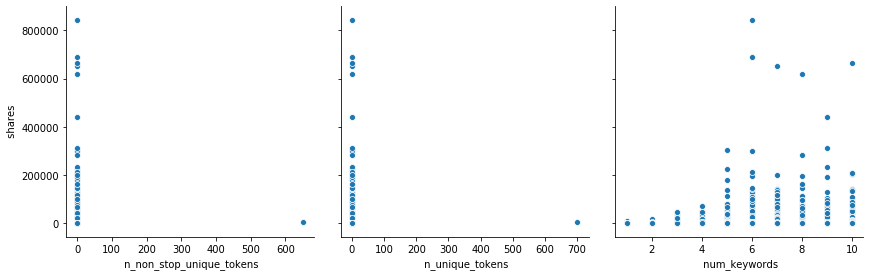

In [518]:
sns.pairplot(df,x_vars=[' n_non_stop_unique_tokens',' n_unique_tokens',' num_keywords'],y_vars=' shares',size=4,aspect=1,kind='scatter')

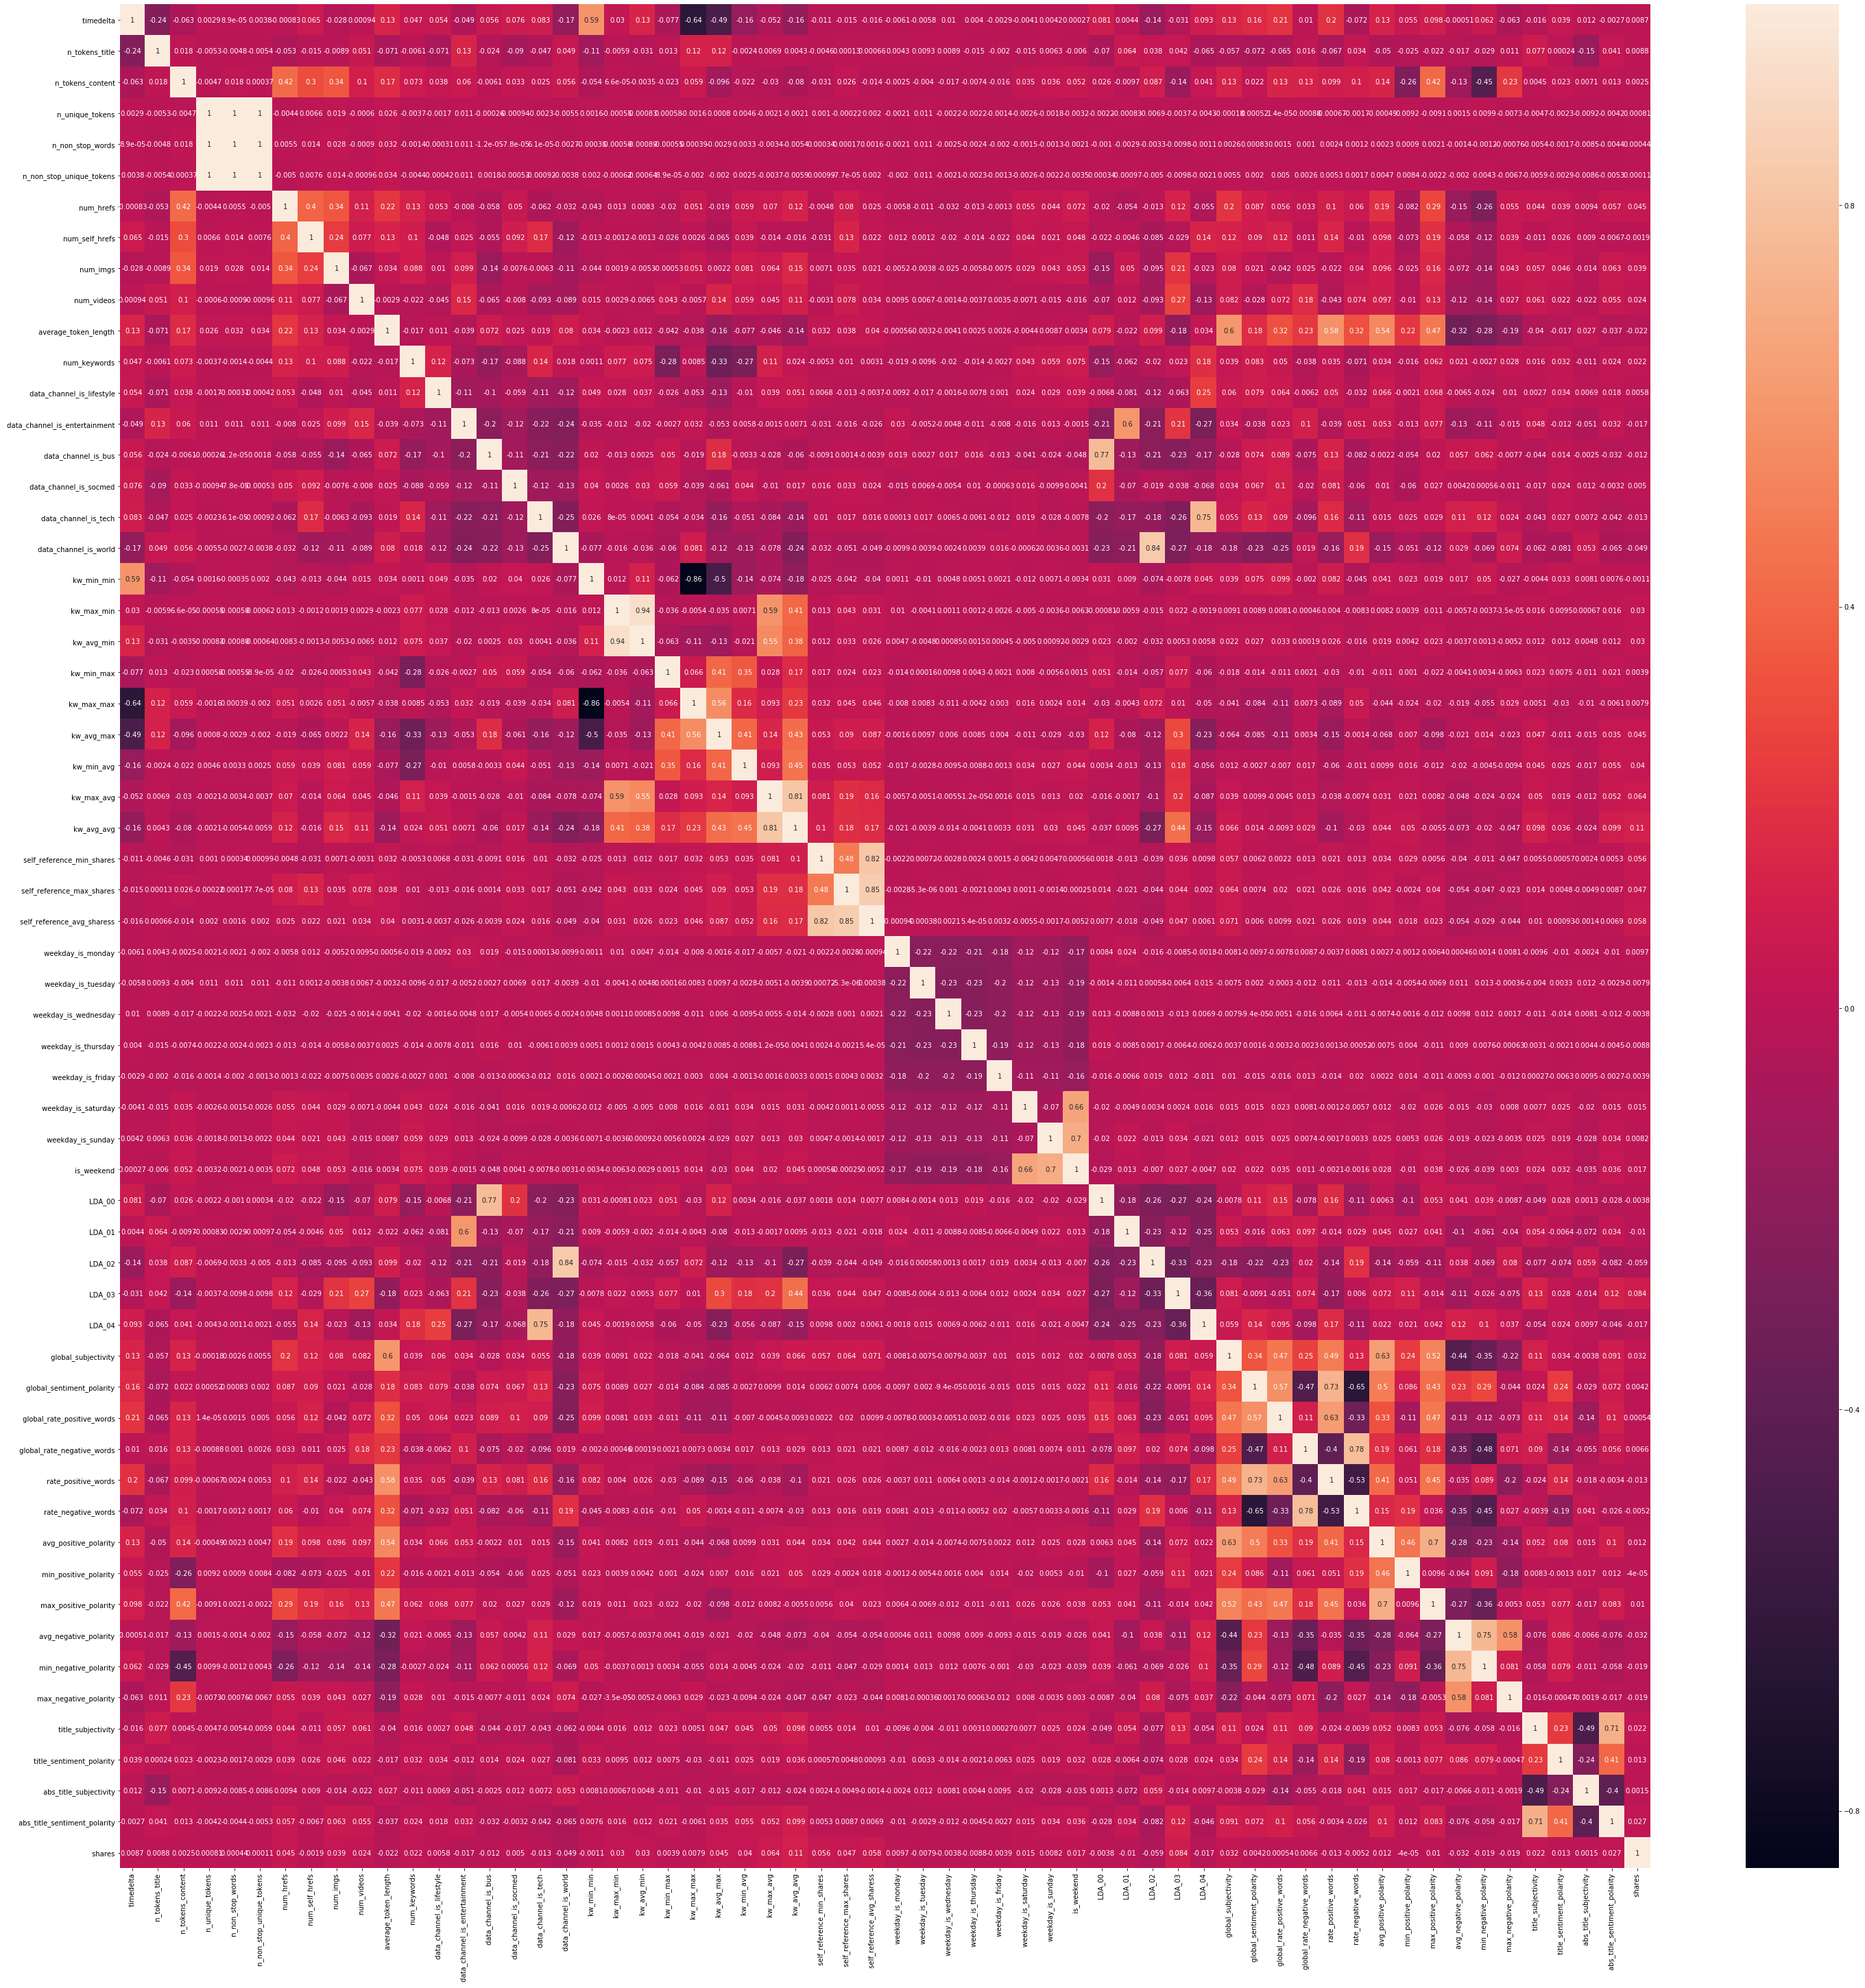

In [519]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)

In [520]:
df[' n_unique_tokens'].corr(df[' shares'])

0.0008063456613076681

In [521]:
df[' n_non_stop_unique_tokens'].corr(df[' shares'])

0.00011417193781091234

In [522]:
df[' timedelta'].corr(df[' shares'])

0.00866228771126255

In [523]:
df[' n_tokens_title'].corr(df[' shares'])

0.008783118841819001

In [524]:
X=df.drop(['url',' shares',' n_unique_tokens',' n_non_stop_unique_tokens'],axis=1)

In [525]:
type(X)

pandas.core.frame.DataFrame

In [526]:
y=df[' shares']

In [527]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [528]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [529]:
lr.params

const                             -2522.378895
 timedelta                            2.273666
 n_tokens_title                     135.610898
 n_tokens_content                     0.607285
 n_non_stop_words                   152.110676
 num_hrefs                           22.045368
 num_self_hrefs                     -72.034078
 num_imgs                             9.977781
 num_videos                          -2.228895
 average_token_length              -441.617349
 num_keywords                        79.927341
 data_channel_is_lifestyle         -649.734816
 data_channel_is_entertainment     -891.788840
 data_channel_is_bus               -470.894028
 data_channel_is_socmed            -383.940458
 data_channel_is_tech              -229.912543
 data_channel_is_world             -114.555923
 kw_min_min                           1.058745
 kw_max_min                           0.096533
 kw_avg_min                          -0.321196
 kw_min_max                          -0.003393
 kw_max_max  

In [530]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     11.62
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           2.44e-97
Time:                        12:50:36   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27695   BIC:                         6.023e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [531]:
X=X.drop([' n_non_stop_words'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     11.84
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           7.06e-98
Time:                        12:50:36   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27696   BIC:                         6.023e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [532]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [533]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
28              weekday_is_tuesday    inf
39                          LDA_04    inf
37                          LDA_02    inf
36                          LDA_01    inf
35                          LDA_00    inf
34                      is_weekend    inf
33               weekday_is_sunday    inf
32             weekday_is_saturday    inf
31               weekday_is_friday    inf
30             weekday_is_thursday    inf
29            weekday_is_wednesday    inf
27               weekday_is_monday    inf
38                          LDA_03    inf
26      self_reference_avg_sharess  20.74
44             rate_positive_words  18.28
45             rate_negative_words  16.43
16                      kw_max_min  14.10
17                      kw_avg_min  13.73
7             average_token_length  11.10
23                      kw_avg_avg  11.04
25       self_reference_max_shares   8.59
41       global_sentiment_polarity   8.03
49           avg_negative_polarity   7.67
22                      kw_max_avg   7.47
24       self_reference_min_shares   7.37
14           data_channel_is_world   7.14
43      global_rate_negative_words   6.55
13            data_channel_is_tech   6.28
46           avg_positive_polarity   6.04
11             data_channel_is_bus   5.87
50           min_negative_polarity   5.23
19                      kw_max_max   4.81
42      global_rate_positive_words   4.63
20                      kw_avg_max   3.94
15                      kw_min_min   3.87
48           max_positive_polarity   3.32
40             global_subjectivity   2.94
51           max_negative_polarity   2.93
10   data_channel_is_entertainment   2.87
55    abs_title_sentiment_polarity   2.42
52              title_subjectivity   2.38
9        data_channel_is_lifestyle   2.34
12          data_channel_is_socmed   2.29
2                 n_tokens_content   2.28
21                      kw_min_avg   2.23
0                        timedelta   2.12
47           min_positive_polarity   1.91
3                        num_hrefs   1.70
8                     num_keywords   1.51
5                         num_imgs   1.44
4                   num_self_hrefs   1.42
54          abs_title_subjectivity   1.42
18                      kw_min_max   1.38
53        title_sentiment_polarity   1.33
6                       num_videos   1.24
1                   n_tokens_title   1.14

In [534]:
X=X.drop([' num_videos'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.07
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           2.03e-98
Time:                        12:50:59   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27697   BIC:                         6.023e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [535]:
X=X.drop([' LDA_00'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.07
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           2.03e-98
Time:                        12:50:59   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27697   BIC:                         6.023e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [536]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
32               weekday_is_sunday    inf
33                      is_weekend    inf
31             weekday_is_saturday    inf
27              weekday_is_tuesday  48.80
28            weekday_is_wednesday  48.43
29             weekday_is_thursday  47.91
26               weekday_is_monday  44.13
30               weekday_is_friday  37.87
25      self_reference_avg_sharess  20.72
42             rate_positive_words  18.28
43             rate_negative_words  16.40
15                      kw_max_min  14.10
16                      kw_avg_min  13.73
6             average_token_length  11.10
22                      kw_avg_avg  11.04
24       self_reference_max_shares   8.57
39       global_sentiment_polarity   8.02
47           avg_negative_polarity   7.66
21                      kw_max_avg   7.47
23       self_reference_min_shares   7.37
13           data_channel_is_world   7.14
36                          LDA_03   6.57
41      global_rate_negative_words   6.48
12            data_channel_is_tech   6.27
44           avg_positive_polarity   6.04
35                          LDA_02   6.02
10             data_channel_is_bus   5.87
48           min_negative_polarity   5.23
37                          LDA_04   5.21
18                      kw_max_max   4.80
40      global_rate_positive_words   4.62
34                          LDA_01   4.04
19                      kw_avg_max   3.88
14                      kw_min_min   3.87
46           max_positive_polarity   3.31
38             global_subjectivity   2.94
49           max_negative_polarity   2.93
9    data_channel_is_entertainment   2.86
53    abs_title_sentiment_polarity   2.42
50              title_subjectivity   2.38
8        data_channel_is_lifestyle   2.34
11          data_channel_is_socmed   2.29
2                 n_tokens_content   2.25
20                      kw_min_avg   2.23
0                        timedelta   2.11
45           min_positive_polarity   1.91
3                        num_hrefs   1.69
7                     num_keywords   1.51
4                   num_self_hrefs   1.42
52          abs_title_subjectivity   1.42
17                      kw_min_max   1.38
5                         num_imgs   1.38
51        title_sentiment_polarity   1.33
1                   n_tokens_title   1.14

In [537]:
X=X.drop([' title_subjectivity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.30
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           5.79e-99
Time:                        12:51:16   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27698   BIC:                         6.023e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [538]:
X=X.drop([' global_sentiment_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.55
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.64e-99
Time:                        12:51:16   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27699   BIC:                         6.023e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [539]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
31             weekday_is_saturday    inf
32               weekday_is_sunday    inf
33                      is_weekend    inf
27              weekday_is_tuesday  48.53
28            weekday_is_wednesday  48.17
29             weekday_is_thursday  47.64
26               weekday_is_monday  43.89
30               weekday_is_friday  37.67
25      self_reference_avg_sharess  20.72
41             rate_positive_words  18.25
42             rate_negative_words  15.81
15                      kw_max_min  14.09
16                      kw_avg_min  13.73
6             average_token_length  11.09
22                      kw_avg_avg  11.03
24       self_reference_max_shares   8.57
21                      kw_max_avg   7.46
23       self_reference_min_shares   7.37
13           data_channel_is_world   7.14
46           avg_negative_polarity   6.83
36                          LDA_03   6.56
12            data_channel_is_tech   6.27
35                          LDA_02   6.02
10             data_channel_is_bus   5.87
40      global_rate_negative_words   5.81
47           min_negative_polarity   5.23
37                          LDA_04   5.21
18                      kw_max_max   4.80
34                          LDA_01   4.04
19                      kw_avg_max   3.88
43           avg_positive_polarity   3.88
14                      kw_min_min   3.87
39      global_rate_positive_words   3.81
45           max_positive_polarity   3.31
9    data_channel_is_entertainment   2.86
48           max_negative_polarity   2.85
38             global_subjectivity   2.80
8        data_channel_is_lifestyle   2.34
11          data_channel_is_socmed   2.29
2                 n_tokens_content   2.25
20                      kw_min_avg   2.22
0                        timedelta   2.11
44           min_positive_polarity   1.88
3                        num_hrefs   1.69
7                     num_keywords   1.51
51    abs_title_sentiment_polarity   1.44
4                   num_self_hrefs   1.42
17                      kw_min_max   1.38
5                         num_imgs   1.38
49        title_sentiment_polarity   1.30
50          abs_title_subjectivity   1.28
1                   n_tokens_title   1.14

In [540]:
X=X.drop([' max_negative_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.80
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          4.67e-100
Time:                        12:51:33   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27700   BIC:                         6.023e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [541]:
X=X.drop([' max_positive_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())




                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     13.07
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.31e-100
Time:                        12:51:33   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27701   BIC:                         6.023e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [542]:
X=X.drop([' data_channel_is_world'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())




                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     13.35
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          3.66e-101
Time:                        12:51:34   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27702   BIC:                         6.023e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [543]:
X=X.drop([' LDA_03'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())




                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.64
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          9.92e-102
Time:                        12:51:34   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27703   BIC:                         6.022e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [544]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
32                      is_weekend    inf
31               weekday_is_sunday    inf
30             weekday_is_saturday    inf
26              weekday_is_tuesday  39.36
27            weekday_is_wednesday  39.07
28             weekday_is_thursday  38.63
25               weekday_is_monday  35.47
29               weekday_is_friday  30.58
24      self_reference_avg_sharess  20.72
39             rate_positive_words  18.05
40             rate_negative_words  15.78
14                      kw_max_min  14.06
15                      kw_avg_min  13.69
6             average_token_length  11.05
21                      kw_avg_avg  10.45
23       self_reference_max_shares   8.56
22       self_reference_min_shares   7.36
20                      kw_max_avg   7.21
38      global_rate_negative_words   5.77
17                      kw_max_max   4.75
44           min_negative_polarity   3.89
13                      kw_min_min   3.87
37      global_rate_positive_words   3.77
18                      kw_avg_max   3.77
35                          LDA_04   3.61
12            data_channel_is_tech   3.44
43           avg_negative_polarity   2.98
36             global_subjectivity   2.76
34                          LDA_02   2.72
41           avg_positive_polarity   2.36
9    data_channel_is_entertainment   2.22
19                      kw_min_avg   2.19
2                 n_tokens_content   2.13
0                        timedelta   2.08
10             data_channel_is_bus   2.08
33                          LDA_01   1.76
42           min_positive_polarity   1.69
3                        num_hrefs   1.68
8        data_channel_is_lifestyle   1.55
7                     num_keywords   1.51
47    abs_title_sentiment_polarity   1.44
4                   num_self_hrefs   1.42
16                      kw_min_max   1.37
5                         num_imgs   1.35
11          data_channel_is_socmed   1.31
45        title_sentiment_polarity   1.29
46          abs_title_subjectivity   1.28
1                   n_tokens_title   1.13

In [545]:
X=X.drop([' kw_max_max'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())




                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.94
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.76e-102
Time:                        12:51:44   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27704   BIC:                         6.022e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [546]:
X=X.drop([' data_channel_is_tech'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     14.25
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          7.87e-103
Time:                        12:51:44   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27705   BIC:                         6.022e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [547]:
X=X.drop([' global_rate_negative_words'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     14.58
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.20e-103
Time:                        12:51:45   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27706   BIC:                         6.022e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [548]:
X=X.drop([' weekday_is_monday'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     14.58
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.20e-103
Time:                        12:51:45   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27706   BIC:                         6.022e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [549]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
29                      is_weekend     inf
27             weekday_is_saturday     inf
28               weekday_is_sunday     inf
6             average_token_length  333.15
35             rate_positive_words  238.61
19                      kw_avg_avg   63.03
36             rate_negative_words   51.38
33             global_subjectivity   42.34
37           avg_positive_polarity   29.57
1                   n_tokens_title   22.92
22      self_reference_avg_sharess   22.10
7                     num_keywords   18.45
14                      kw_avg_min   17.19
40           min_negative_polarity   16.46
39           avg_negative_polarity   15.38
13                      kw_max_min   15.19
16                      kw_avg_max   14.29
34      global_rate_positive_words   13.54
18                      kw_max_avg   12.55
21       self_reference_max_shares    9.10
20       self_reference_min_shares    7.64
0                        timedelta    6.68
42          abs_title_subjectivity    5.20
2                 n_tokens_content    4.98
38           min_positive_polarity    4.74
17                      kw_min_avg    4.28
31                          LDA_02    3.42
3                        num_hrefs    3.25
32                          LDA_04    3.21
4                   num_self_hrefs    2.50
9    data_channel_is_entertainment    2.44
30                          LDA_01    2.38
10             data_channel_is_bus    2.09
12                      kw_min_min    2.09
43    abs_title_sentiment_polarity    2.09
23              weekday_is_tuesday    2.08
24            weekday_is_wednesday    2.07
25             weekday_is_thursday    2.06
26               weekday_is_friday    1.83
5                         num_imgs    1.74
15                      kw_min_max    1.42
41        title_sentiment_polarity    1.38
11          data_channel_is_socmed    1.23
8        data_channel_is_lifestyle    1.21

In [550]:
X=X.drop([' kw_avg_max'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     14.92
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          6.58e-104
Time:                        12:51:54   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27707   BIC:                         6.022e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [551]:
X=X.drop([' title_sentiment_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     15.27
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.02e-104
Time:                        12:51:54   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27708   BIC:                         6.022e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [552]:
X=X.drop([' rate_negative_words'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     15.65
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          6.13e-105
Time:                        12:51:54   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27709   BIC:                         6.022e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [553]:
# X=X.drop([' min_negative_polarity'],axis=1)
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
# X_train_sm=sm.add_constant(X_train)
# lr=sm.OLS(y_train,X_train_sm).fit()
# print(lr.summary())



In [554]:
df[' min_negative_polarity'].corr(df[' shares'])

-0.019297375184780096

In [555]:
X=X.drop([' is_weekend'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     15.65
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          6.13e-105
Time:                        12:51:55   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27709   BIC:                         6.022e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [556]:
X=X.drop([' rate_positive_words'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     16.04
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.60e-105
Time:                        12:51:55   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27710   BIC:                         6.022e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [557]:
X=X.drop([' weekday_is_saturday'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     16.46
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          4.35e-106
Time:                        12:51:55   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27711   BIC:                         6.022e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [558]:
X=X.drop([' data_channel_is_socmed'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     16.89
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.43e-106
Time:                        12:51:56   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27712   BIC:                         6.022e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [559]:
X=X.drop([' data_channel_is_bus'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     17.33
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          5.17e-107
Time:                        12:51:56   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27713   BIC:                         6.022e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [560]:
X=X.drop([' min_negative_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     17.81
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.72e-107
Time:                        12:51:56   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27714   BIC:                         6.021e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [561]:
X=X.drop([' LDA_01'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     18.31
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          5.85e-108
Time:                        12:51:56   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27715   BIC:                         6.021e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [562]:
X=X.drop([' avg_positive_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.21e-108
Time:                        12:51:57   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27716   BIC:                         6.021e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [563]:
X=X.drop([' kw_min_min'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     19.39
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          8.33e-109
Time:                        12:51:57   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27717   BIC:                         6.021e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [564]:
X=X.drop([' num_imgs'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     19.97
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          3.39e-109
Time:                        12:51:57   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27718   BIC:                         6.021e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [565]:
X=X.drop([' kw_avg_min'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     20.61
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.13e-109
Time:                        12:51:57   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27719   BIC:                         6.021e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [566]:
X=X.drop([' LDA_04'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     21.26
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          5.22e-110
Time:                        12:51:58   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27720   BIC:                         6.021e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [567]:
X=X.drop([' weekday_is_sunday'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     21.96
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.40e-110
Time:                        12:51:58   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27721   BIC:                         6.021e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [568]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
5             average_token_length  46.60
13                      kw_avg_avg  36.96
22             global_subjectivity  35.97
16      self_reference_avg_sharess  22.04
1                   n_tokens_title  19.69
6                     num_keywords  16.12
12                      kw_max_avg   9.73
23      global_rate_positive_words   9.71
15       self_reference_max_shares   9.07
14       self_reference_min_shares   7.63
25           avg_negative_polarity   6.84
26          abs_title_subjectivity   5.02
0                        timedelta   4.15
11                      kw_min_avg   3.98
24           min_positive_polarity   3.70
2                 n_tokens_content   3.39
3                        num_hrefs   2.91
4                   num_self_hrefs   2.38
21                          LDA_02   2.21
9                       kw_max_min   1.81
27    abs_title_sentiment_polarity   1.79
17              weekday_is_tuesday   1.61
18            weekday_is_wednesday   1.61
19             weekday_is_thursday   1.60
20               weekday_is_friday   1.47
8    data_channel_is_entertainment   1.37
10                      kw_min_max   1.27
7        data_channel_is_lifestyle   1.12

In [569]:
X=X.drop([' weekday_is_wednesday'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     22.71
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.16e-110
Time:                        12:52:01   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27722   BIC:                         6.021e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [570]:
X=X.drop([' num_keywords'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     23.49
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          7.63e-111
Time:                        12:52:02   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27723   BIC:                         6.021e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [571]:
X=X.drop([' self_reference_avg_sharess'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     24.35
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          3.73e-111
Time:                        12:52:02   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27724   BIC:                         6.021e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [572]:
X=X.drop([' data_channel_is_lifestyle'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     25.27
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.15e-111
Time:                        12:52:02   Log-Likelihood:            -3.0089e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27725   BIC:                         6.020e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [573]:
X=X.drop([' abs_title_subjectivity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     26.26
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.41e-111
Time:                        12:52:02   Log-Likelihood:            -3.0090e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27726   BIC:                         6.020e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [574]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
5             average_token_length  44.92
18             global_subjectivity  35.76
11                      kw_avg_avg  32.79
1                   n_tokens_title  17.88
19      global_rate_positive_words   9.54
10                      kw_max_avg   9.40
21           avg_negative_polarity   6.82
0                        timedelta   4.00
20           min_positive_polarity   3.70
9                       kw_min_avg   3.66
2                 n_tokens_content   3.36
3                        num_hrefs   2.89
4                   num_self_hrefs   2.28
17                          LDA_02   2.14
7                       kw_max_min   1.81
13       self_reference_max_shares   1.54
22    abs_title_sentiment_polarity   1.54
12       self_reference_min_shares   1.42
14              weekday_is_tuesday   1.38
15             weekday_is_thursday   1.37
6    data_channel_is_entertainment   1.34
16               weekday_is_friday   1.29
8                       kw_min_max   1.22

In [575]:
X=X.drop([' min_positive_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     27.32
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.10e-111
Time:                        12:52:05   Log-Likelihood:            -3.0090e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27727   BIC:                         6.020e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [576]:
X=X.drop([' abs_title_sentiment_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     28.47
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          8.77e-112
Time:                        12:52:05   Log-Likelihood:            -3.0090e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27728   BIC:                         6.020e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [577]:
X=X.drop([' weekday_is_friday'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     29.74
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          6.82e-112
Time:                        12:52:05   Log-Likelihood:            -3.0090e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27729   BIC:                         6.020e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [578]:
X=X.drop([' global_rate_positive_words'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     31.13
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          6.05e-112
Time:                        12:52:05   Log-Likelihood:            -3.0090e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27730   BIC:                         6.020e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [579]:
df[' global_rate_positive_words'].corr(df[' shares'])

0.0005432341490310214

In [580]:
X=X.drop([' LDA_02'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     32.72
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          3.52e-112
Time:                        12:52:06   Log-Likelihood:            -3.0090e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27731   BIC:                         6.020e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [581]:
X=X.drop([' weekday_is_thursday'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     34.46
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.50e-112
Time:                        12:52:06   Log-Likelihood:            -3.0090e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27732   BIC:                         6.020e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [582]:
X=X.drop([' weekday_is_tuesday'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     36.46
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.43e-112
Time:                        12:52:06   Log-Likelihood:            -3.0091e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27733   BIC:                         6.020e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [583]:
X=X.drop([' self_reference_max_shares'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     38.66
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.15e-112
Time:                        12:52:06   Log-Likelihood:            -3.0091e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27734   BIC:                         6.020e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [584]:
X=X.drop([' kw_max_min'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     41.17
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          9.85e-113
Time:                        12:52:06   Log-Likelihood:            -3.0091e+05
No. Observations:               27750   AIC:                         6.018e+05
Df Residuals:                   27735   BIC:                         6.020e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [585]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
5             average_token_length  36.90
10                      kw_avg_avg  29.94
12             global_subjectivity  28.66
1                   n_tokens_title  16.82
9                       kw_max_avg   6.96
13           avg_negative_polarity   6.70
0                        timedelta   3.82
8                       kw_min_avg   3.62
2                 n_tokens_content   3.08
3                        num_hrefs   2.82
4                   num_self_hrefs   2.19
6    data_channel_is_entertainment   1.27
7                       kw_min_max   1.22
11       self_reference_min_shares   1.05

In [586]:
X=X.drop([' average_token_length'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     43.22
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          1.56e-110
Time:                        12:52:07   Log-Likelihood:            -3.0092e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27736   BIC:                         6.020e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [587]:
X=X.drop([' global_subjectivity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     46.79
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.69e-111
Time:                        12:52:07   Log-Likelihood:            -3.0092e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27737   BIC:                         6.020e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [588]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
9                       kw_avg_avg  28.11
1                   n_tokens_title  11.25
8                       kw_max_avg   6.74
11           avg_negative_polarity   5.25
7                       kw_min_avg   3.60
0                        timedelta   3.18
2                 n_tokens_content   3.02
3                        num_hrefs   2.79
4                   num_self_hrefs   2.18
5    data_channel_is_entertainment   1.26
6                       kw_min_max   1.22
10       self_reference_min_shares   1.05

In [589]:
X=X.drop([' kw_avg_avg'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     29.08
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.33e-61
Time:                        12:52:08   Log-Likelihood:            -3.0104e+05
No. Observations:               27750   AIC:                         6.021e+05
Df Residuals:                   27738   BIC:                         6.022e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [590]:
X=X.drop([' n_tokens_title'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     30.80
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           7.11e-60
Time:                        12:52:08   Log-Likelihood:            -3.0104e+05
No. Observations:               27750   AIC:                         6.021e+05
Df Residuals:                   27739   BIC:                         6.022e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [591]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
9           avg_negative_polarity  3.99
1                n_tokens_content  2.84
2                       num_hrefs  2.70
0                       timedelta  2.68
3                  num_self_hrefs  2.17
6                      kw_min_avg  2.09
7                      kw_max_avg  1.78
4   data_channel_is_entertainment  1.24
5                      kw_min_max  1.22
8       self_reference_min_shares  1.05

In [592]:
X=X.drop([' n_tokens_content'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.22
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.19e-60
Time:                        12:52:08   Log-Likelihood:            -3.0104e+05
No. Observations:               27750   AIC:                         6.021e+05
Df Residuals:                   27740   BIC:                         6.022e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [593]:
X=X.drop([' kw_min_max'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     38.11
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           8.22e-61
Time:                        12:52:08   Log-Likelihood:            -3.0104e+05
No. Observations:               27750   AIC:                         6.021e+05
Df Residuals:                   27741   BIC:                         6.022e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [594]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
7           avg_negative_polarity  3.75
0                       timedelta  2.66
1                       num_hrefs  2.34
2                  num_self_hrefs  2.08
4                      kw_min_avg  1.81
5                      kw_max_avg  1.78
3   data_channel_is_entertainment  1.23
6       self_reference_min_shares  1.05

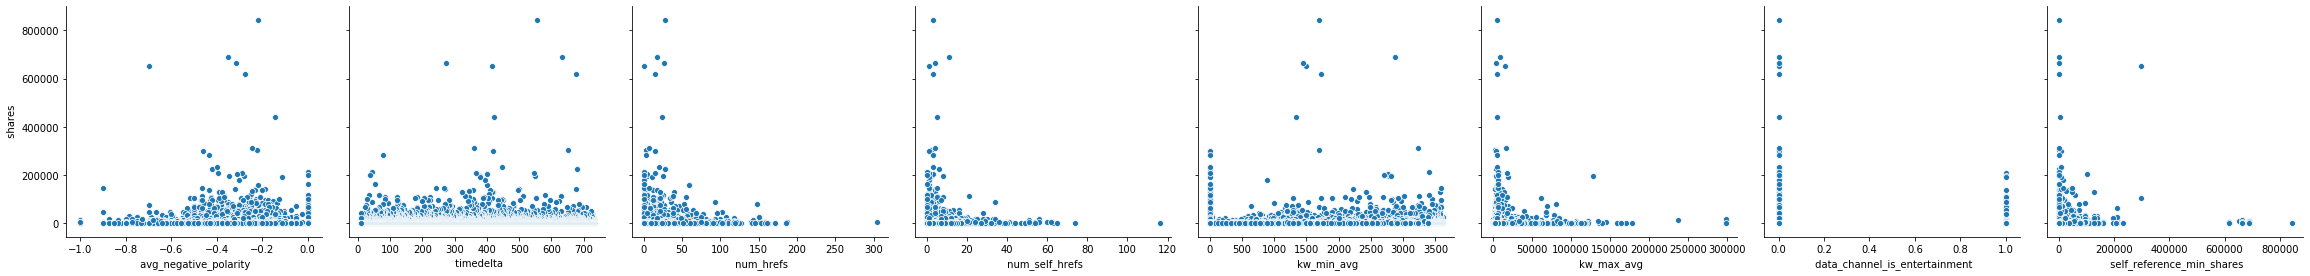

In [595]:
sns.pairplot(df,x_vars=[' avg_negative_polarity',' timedelta',' num_hrefs',' num_self_hrefs',' kw_min_avg',' kw_max_avg',' data_channel_is_entertainment',' self_reference_min_shares'],y_vars=' shares',size=4,aspect=1,kind='scatter')

In [596]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df1 = remove_outlier(df,' shares')
# df1

In [597]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' avg_negative_polarity')


In [598]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' timedelta')


In [599]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' num_hrefs')


In [600]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' num_self_hrefs')


In [601]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' kw_min_avg')


In [602]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' kw_max_avg')


In [603]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' data_channel_is_entertainment')


In [604]:
# def remove_outlier(df_in, col_name):
#     q1=df_in[col_name].quantile(0.25)
#     q3=df_in[col_name].quantile(0.75)
#     iqr=q3-q1 #Interquartile range
#     fence_low=q1-1.5*iqr
#     fence_high=q3+1.5*iqr
#     df_out=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# df = remove_outlier(df,' self_reference_min_shares')


In [605]:
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
5       http://mashable.com/2013/01/07/beewi-smart-toys/       731.0   
6      http://mashable.com/2013/01/07/bodymedia-armba...       731.0   
7       http://mashable.com/2013/01/07/canon-poweshot-n/       731.0   
8      http://mashable.com/2013/01/07/car-of-the-futu...       731.0   
9      http://mashable.com/2013/01/07/chuck-hagel-web...       731.0   
10     http://mashable.com/2013/01/07/cosmic-events-d...       731.0   
11      http://mashable.com/2013/01/07/crayon-creatures/       731.0   
12         http://mashable.com/2013/01/07/creature-cups/       731.0   
13             http://mashable.com/2013/01/07/dad-jokes/       731.0   
14     http://mashable.com/2013/01/07/downton-abbey-t...       731.0   
15     http://mashable.com/2013/01/07/earth-size-plan...       731.0   
16             http://mashable.com/2013/01/07/echo-game/       731.0   
17     http://mashable.com/2013/01/07/entrepreneur-tr...       731.0   
18     http://mashable.com/2013/01/07/facebook-sick-app/       731.0   
19     http://mashable.com/2013/01/07/felt-audio-puls...       731.0   
20          http://mashable.com/2013/01/07/ford-glympse/       731.0   
21      http://mashable.com/2013/01/07/ftc-google-leaks/       731.0   
22     http://mashable.com/2013/01/07/fujifilm-50x-su...       731.0   
23     http://mashable.com/2013/01/07/hillary-clinton...       731.0   
24                http://mashable.com/2013/01/07/htc-q1/       731.0   
25     http://mashable.com/2013/01/07/huawei-ascend-m...       731.0   
26     http://mashable.com/2013/01/07/iheartradio-app...       731.0   
27     http://mashable.com/2013/01/07/intel-awesome-l...       731.0   
28     http://mashable.com/2013/01/07/isp02-iphone-ta...       731.0   
29        http://mashable.com/2013/01/07/jobs-contently/       731.0   
...                                                  ...         ...   
39614  http://mashable.com/2014/12/26/the-interview-i...         9.0   
39615  http://mashable.com/2014/12/26/toothpaste-fluo...         9.0   
39616  http://mashable.com/2014/12/26/top-photography...         9.0   
39617  http://mashable.com/2014/12/26/tor-attacked-li...         9.0   
39618  http://mashable.com/2014/12/26/tsa-gift-wrap-r...         9.0   
39619  http://mashable.com/2014/12/26/tsunami-10-year...         9.0   
39620  http://mashable.com/2014/12/26/turkey-teen-ins...         9.0   
39621  http://mashable.com/2014/12/26/ukraine-prisone...         9.0   
39622  http://mashable.com/2014/12/26/wacky-kickstart...         9.0   
39623        http://mashable.com/2014/12/26/what-is-tor/         9.0   
39624  http://mashable.com/2014/12/27/air-asia-flight...         9.0   
39625  http://mashable.com/2014/12/27/als-ice-bucket-...         9.0   
39626  http://mashable.com/2014/12/27/christmas-tree-...         9.0   
39627  http://mashable.com/2014/12/27/extremist-leade...         9.0   
39628  http://mashable.com/2014/12/27/facebook-year-i...         9.0   
39629  http://mashable.com/2014/12/27/frozen-doll-prank/         9.0   
39630  http://mashable.com/2014/12/27/high-school-i-c...         9.0   
39631  http://mashable.com/2014/12/27/japan-elderly-d...         9.0   
39632  http://mashable.com/2014/12/27/las-vegas-new-y...         9.0   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...         9.0   
39634  http://mashable.com/2014/12/27/music-grid-outf...         9.0   
39635   http://mashable.com/2014/12/27/nike-marc-newson/         9.0   
39636  http://mashable.com/2014/12/27/north-korea-int...         8.0   
39637  http://mashable.com/2014/12/27/nypd-rafael-ram...         8.0   
39638  http://mashabl

In [606]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     38.11
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           8.22e-61
Time:                        12:52:19   Log-Likelihood:            -3.0104e+05
No. Observations:               27750   AIC:                         6.021e+05
Df Residuals:                   27741   BIC:                         6.022e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [607]:
# X=pd.DataFrame[[' avg_negative_polarity',' timedelta',' num_hrefs',' num_self_hrefs',' kw_min_avg',' kw_max_avg',' data_channel_is_entertainment',' self_reference_min_shares']]
X=df[[' avg_negative_polarity',' timedelta']]
X

avg_negative_polarity   timedelta
0                   -0.350000       731.0
1                   -0.118750       731.0
2                   -0.466667       731.0
3                   -0.369697       731.0
4                   -0.220192       731.0
5                   -0.195000       731.0
6                   -0.224479       731.0
7                   -0.242778       731.0
8                   -0.125000       731.0
9                   -0.238095       731.0
10                  -0.415064       731.0
11                  -0.262500       731.0
12                  -0.310417       731.0
13                  -0.337889       731.0
14                  -0.138690       731.0
15                  -0.220150       731.0
16                  -0.401437       731.0
17                  -0.144643       731.0
18                  -0.125000       731.0
19                  -0.226786       731.0
20                  -0.206548       731.0
21                  -0.108333       731.0
22                  -0.230263       731.0
23                   0.000000       731.0
24                  -0.456481       731.0
25                  -0.116667       731.0
26                  -0.263889       731.0
27                  -0.202292       731.0
28                  -0.177500       731.0
29                  -0.213889       731.0
...                       ...         ...
39614               -0.225694         9.0
39615                0.000000         9.0
39616                0.000000         9.0
39617               -0.188889         9.0
39618               -0.170833         9.0
39619               -0.271429         9.0
39620               -0.525000         9.0
39621               -0.282500         9.0
39622               -0.262500         9.0
39623               -0.255208         9.0
39624               -0.179847         9.0
39625               -0.071429         9.0
39626               -0.145833         9.0
39627               -0.325000         9.0
39628               -0.558333         9.0
39629               -0.366667         9.0
39630               -0.164881         9.0
39631               -0.375000         9.0
39632               -0.115000         9.0
39633               -0.181313         9.0
39634               -0.558333         9.0
39635               -0.223611         9.0
39636               -0.231612         8.0
39637               -0.429534         8.0
39638               -0.250000         8.0
39639               -0.260000         8.0
39640               -0.211111         8.0
39641               -0.356439         8.0
39642               -0.205246         8.0
39643               -0.200000         8.0

[39644 rows x 2 columns]

In [608]:
e=df[' shares'].quantile(0.95)
df=df[df[' shares']<e]

In [609]:
e=df[' avg_negative_polarity'].quantile(0.95)
df=df[df[' avg_negative_polarity']<e]

In [610]:
e=df[' timedelta'].quantile(0.95)
df=df[df[' timedelta']<e]

In [611]:
e=df[' num_hrefs'].quantile(0.95)
df=df[df[' num_hrefs']<e]

In [612]:
e=df[' num_self_hrefs'].quantile(0.95)
df=df[df[' num_self_hrefs']<e]

In [613]:
e=df[' kw_min_avg'].quantile(0.95)
df=df[df[' kw_min_avg']<e]

In [614]:
e=df[' kw_max_avg'].quantile(0.95)
df=df[df[' kw_max_avg']<e]

In [615]:
# e=df[' data_channel_is_entertainment'].quantile(0.95)
# df=df[df[' data_channel_is_entertainment']<e]

In [616]:
e=df[' self_reference_min_shares'].quantile(0.95)
df=df[df[' self_reference_min_shares']<e]

In [617]:
df[' data_channel_is_entertainment']

1952     1.0
1953     1.0
1954     0.0
1955     0.0
1956     0.0
1957     0.0
1959     0.0
1960     0.0
1961     0.0
1962     0.0
1963     0.0
1964     0.0
1965     0.0
1966     0.0
1967     0.0
1970     0.0
1971     0.0
1973     0.0
1974     0.0
1975     1.0
1977     0.0
1979     1.0
1980     0.0
1982     1.0
1983     0.0
1984     1.0
1987     0.0
1988     0.0
1989     0.0
1990     0.0
        ... 
39603    0.0
39604    0.0
39605    0.0
39607    0.0
39608    0.0
39609    0.0
39610    0.0
39611    0.0
39614    0.0
39619    0.0
39620    0.0
39622    0.0
39623    0.0
39624    0.0
39625    0.0
39626    0.0
39627    0.0
39628    0.0
39630    0.0
39631    0.0
39632    0.0
39633    0.0
39635    0.0
39636    0.0
39638    0.0
39639    0.0
39640    0.0
39641    0.0
39642    0.0
39643    1.0
Name:  data_channel_is_entertainment, Length: 25533, dtype: float64

In [618]:
X=df[[' avg_negative_polarity',' timedelta',' num_hrefs',' num_self_hrefs',' kw_min_avg',' kw_max_avg',' data_channel_is_entertainment',' self_reference_min_shares']]
y=df[' shares']

In [619]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [620]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [621]:
lr.params

const                             611.293612
 avg_negative_polarity           -136.316631
 timedelta                          0.589005
 num_hrefs                         12.692684
 num_self_hrefs                    25.072769
 kw_min_avg                         0.080372
 kw_max_avg                         0.164004
 data_channel_is_entertainment   -334.901939
 self_reference_min_shares          0.071591
dtype: float64

In [622]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          2.65e-187
Time:                        12:52:21   Log-Likelihood:            -1.5846e+05
No. Observations:               17873   AIC:                         3.169e+05
Df Residuals:                   17864   BIC:                         3.170e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [623]:
X=X.drop([' avg_negative_polarity'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          4.20e-188
Time:                        12:52:21   Log-Likelihood:            -1.5846e+05
No. Observations:               17873   AIC:                         3.169e+05
Df Residuals:                   17865   BIC:                         3.170e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [624]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
4                      kw_max_avg  6.01
1                       num_hrefs  3.11
0                       timedelta  3.00
2                  num_self_hrefs  2.95
3                      kw_min_avg  1.94
6       self_reference_min_shares  1.76
5   data_channel_is_entertainment  1.25